In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Catphan = np.load('/home/xcite/MV_CBCT/projections/Catphan.npy')
Catphan2 = np.load('/home/xcite/MV_CBCT/projections/Catphan2.npy')
Air = np.load('/home/xcite/MV_CBCT/projections/air.npy')

In [3]:
projections = -np.log(Catphan2/Air)

In [4]:
recon_exp = np.load('/home/xcite/MV_CBCT/recon_exp.npy')

In [5]:
recon_fc = np.load('/home/xcite/fastcat-0.0.1/fastcat/data/recons/404_new_file.npy')

<IPython.core.display.Javascript object>


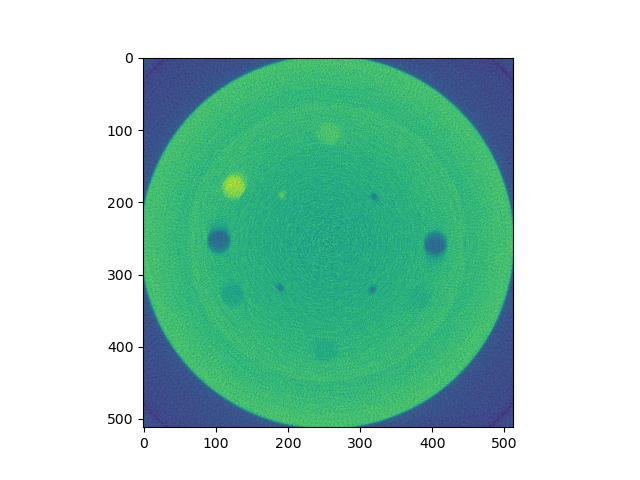

In [6]:
plt.figure()
plt.imshow(recon_exp[76])

<IPython.core.display.Javascript object>


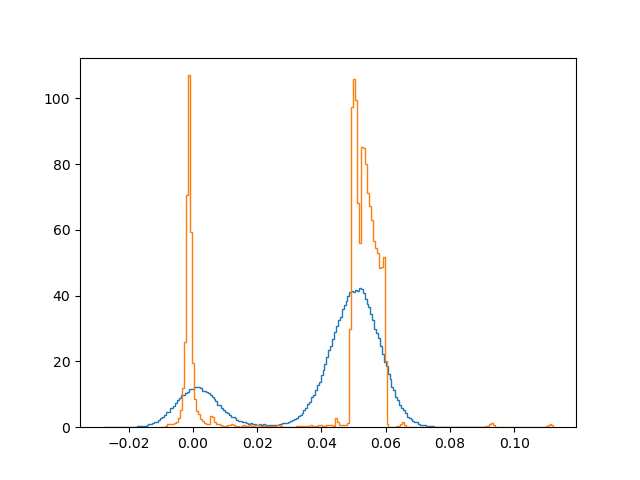

(array([4.36864728e-02, 1.49782192e-01, 3.86937330e-01, 8.55006030e-01,
        9.98547188e-01, 9.48620551e-01, 9.11175003e-01, 1.12960651e+00,
        1.65384504e+00, 2.85834350e+00, 5.34222949e+00, 1.18452705e+01,
        2.59247912e+01, 7.04850033e+01, 1.07006854e+02, 5.94011098e+01,
        1.96277025e+01, 8.66864191e+00, 5.05514803e+00, 3.89433626e+00,
        2.56501907e+00, 1.91596315e+00, 1.41668936e+00, 9.79825175e-01,
        1.04847535e+00, 3.41378320e+00, 2.97068015e+00, 1.56023117e+00,
        1.01726995e+00, 9.23656853e-01, 6.49056167e-01, 3.49491782e-01,
        4.30623803e-01, 3.93177656e-01, 6.92742640e-01, 7.98838359e-01,
        9.54861476e-01, 5.30478598e-01, 3.93178255e-01, 2.18432031e-01,
        1.99709590e-01, 3.55732707e-01, 6.17850602e-01, 3.37010446e-01,
        4.74309553e-01, 5.74165945e-01, 3.80695825e-01, 3.99419788e-01,
        6.24091517e-01, 5.92886941e-01, 4.80551933e-01, 3.18286674e-01,
        4.55588196e-01, 4.49345892e-01, 3.37009419e-01, 4.493472

In [7]:
plt.figure()
plt.hist(10*recon_exp[76].flatten(),bins=200,density=True,histtype='step')

plt.hist(recon_fc[5].flatten(),bins=200,density=True,histtype='step')

<IPython.core.display.Javascript object>


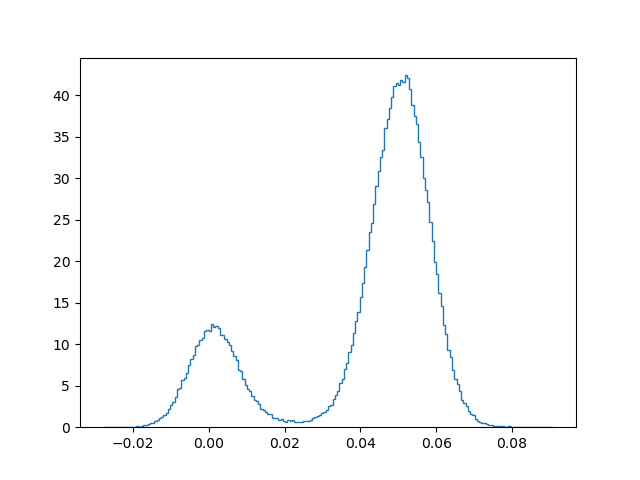

(array([6.40634629e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.40634629e-03, 6.40636633e-03, 1.28126926e-02, 1.28126926e-02,
        0.00000000e+00, 1.28127327e-02, 6.40634629e-03, 6.40634629e-02,
        4.48444240e-02, 6.40636633e-02, 5.76571166e-02, 1.02501541e-01,
        7.68761554e-02, 1.28127327e-01, 2.37034813e-01, 2.37034813e-01,
        3.90787735e-01, 5.06101357e-01, 4.86883079e-01, 8.00793286e-01,
        8.39232676e-01, 1.05704714e+00, 1.24283312e+00, 1.49908503e+00,
        1.71690349e+00, 2.17815774e+00, 2.66504422e+00, 3.06863987e+00,
        3.58755953e+00, 4.57413125e+00, 4.68304646e+00, 5.72727806e+00,
        5.94509400e+00, 6.56651008e+00, 7.45058656e+00, 8.23216142e+00,
        8.72545047e+00, 9.73765397e+00, 9.84656194e+00, 1.05320415e+01,
        1.07434511e+01, 1.15570566e+01, 1.16723721e+01, 1.15378387e+01,
        1.23706644e+01, 1.20695658e+01, 1.22489437e+01, 1.19734706e+01,
        1.11534576e+01, 1.11342386e+01, 1.05896987e+01, 1.025016

In [83]:
plt.figure()
plt.hist(10*recon_exp[76].flatten(),bins=200,density=True,histtype='step')

<IPython.core.display.Javascript object>


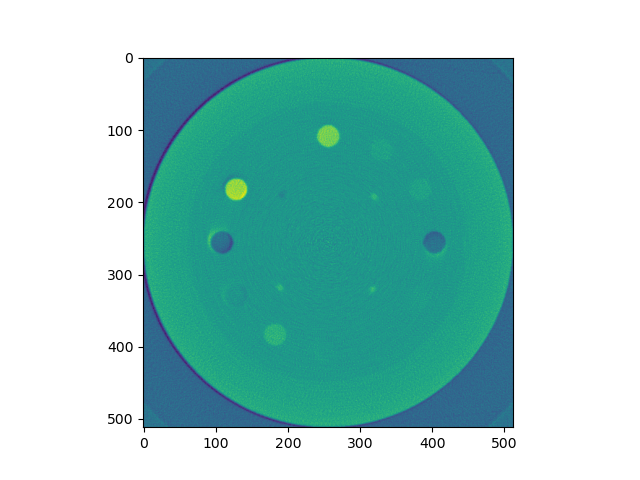

In [84]:
plt.figure()
plt.imshow(recon_fc[5]-10*recon_exp[76])

<IPython.core.display.Javascript object>


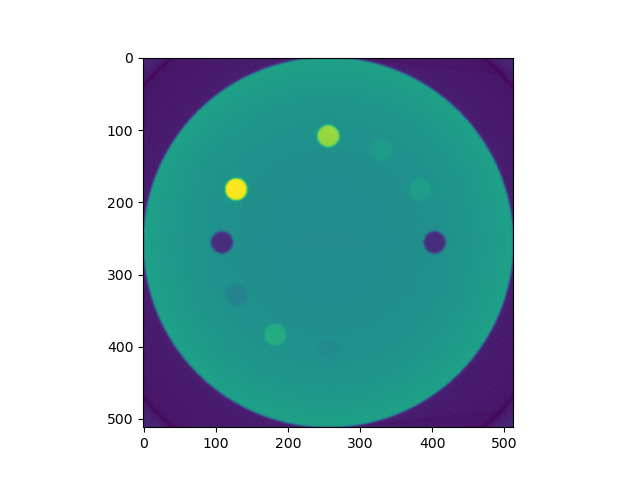

In [49]:
mm = np.nanmean(recon_fc[5,390:400,390:400])
mm_air = np.nanmean(recon_fc[5,440:490,440:490])

im_HU = (recon_fc[5,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

In [50]:
from astropy import stats

<IPython.core.display.Javascript object>


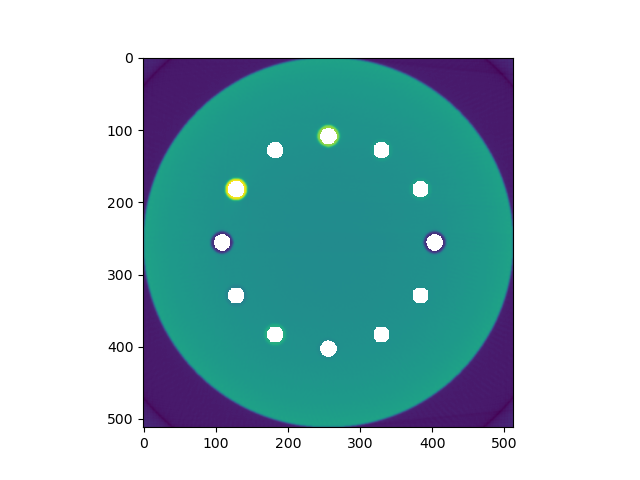

In [53]:
def create_mask(shape):

    im = np.zeros([512,512])
    #im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = 90.0*np.pi/180

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */
    
    create_circular_mask(x= 6.5*cos(A0+1/6*np.pi),  y= 6.5*sin(A0+1/6*np.pi),  r=1.0, index = ii, image = im)

    rad = 5.75

    for ii,jj in enumerate([2,3,4,5,6,7,8,9,10,11,12,13]):

        # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
        create_circular_mask(x= rad*cos(A0+jj/6*np.pi),  y= rad*sin(A0+jj/6*np.pi),  r=0.4, index = ii +2, image = im)

    return im

def create_circular_mask(x, y, r, index, image):

    h,w = image.shape

    center = [x*int(w/2)/10 + int(w/2),y*int(h/2)/10 + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/10


    image[mask] = index
    
recon_slice = im_HU

im = create_mask(recon_slice.shape)

contrast = []
noise = []
cnr = []
ci = []

ii = 1

ref_mean = np.mean(recon_slice[im == 5])
ref_std = np.std(recon_slice[im == 5])

for ii in range(2,int(np.max(im)+1)):

    nsample = len(recon_slice[im == ii])

    if nsample > 2:

        noise.append(np.std(recon_slice[im == ii]))

        booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean) - ref_mean)

        ci.append(np.std(booted))
        contrast.append(np.mean(booted))

        cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))

ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]


im_HU2 = im_HU.copy()

im_HU2[im > 1] = np.NaN

plt.figure()
plt.imshow(im_HU2)

<IPython.core.display.Javascript object>


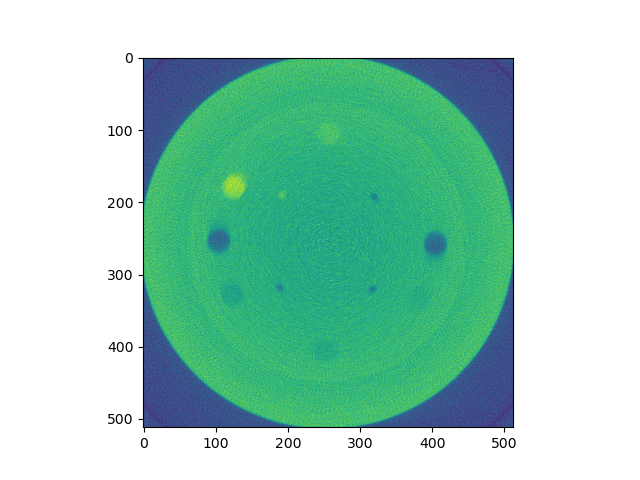

In [54]:
contrasts_fc = contrast

mm = np.nanmean(recon_exp[76,200:300,200:300])
mm_air = np.nanmean(recon_exp[76,450:490,450:490])

im_HU = (recon_exp[76,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

<IPython.core.display.Javascript object>


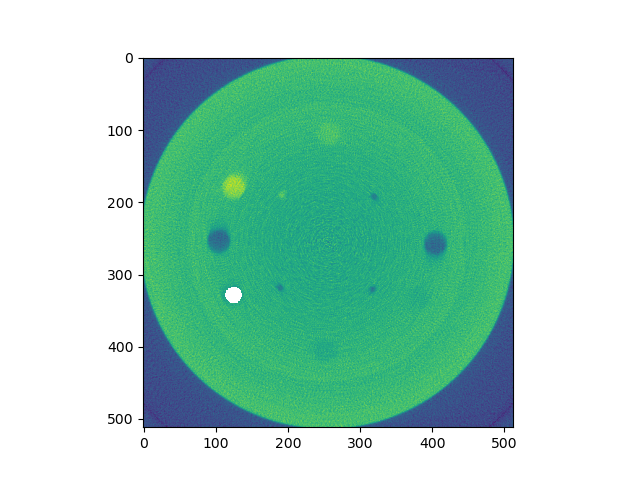

In [58]:
def create_mask(shape):

    im = np.zeros([512,512])
    #im = np.zeros([256,256])
    ii = 1

    # CTMAT(x) formel=H2O dichte=x
    LEN = 100

    A0  = (90.0 + 1)*np.pi/180 

    # Phantom 
    # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
    create_circular_mask(x= 0.000,  y= 0.000,  r=10.0, index = ii, image = im)

    rad = 5.85

    for ii,jj in enumerate([2,3,4,5,6,7,8,9,10,11,12,13]):

        # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
        create_circular_mask(x= rad*cos(A0+jj/6*np.pi),  y= rad*sin(A0+jj/6*np.pi),  r=0.4, index = ii +2, image = im)

    return im

def create_circular_mask(x, y, r, index, image):

    h,w = image.shape

    center = [x*int(w/2)/10 + int(w/2),y*int(h/2)/10 + int(h/2)]

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if r is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= r*int(w/2)/10


    image[mask] = index
    
recon_slice = im_HU

im = create_mask(recon_slice.shape)

contrast = []
noise = []
cnr = []
ci = []

ii = 1

ref_mean = np.mean(recon_slice[im == 5])
ref_std = np.std(recon_slice[im == 5])

for ii in range(2,int(np.max(im)+1)):

    nsample = len(recon_slice[im == ii])

    if nsample > 2:

        noise.append(np.std(recon_slice[im == ii]))

        booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean) - ref_mean)

        ci.append(np.std(booted))
        contrast.append(np.mean(booted))

        cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))

ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]


im_HU2 = im_HU.copy()

im_HU2[im == 2] = np.NaN

plt.figure()
plt.imshow(im_HU2)

<IPython.core.display.Javascript object>


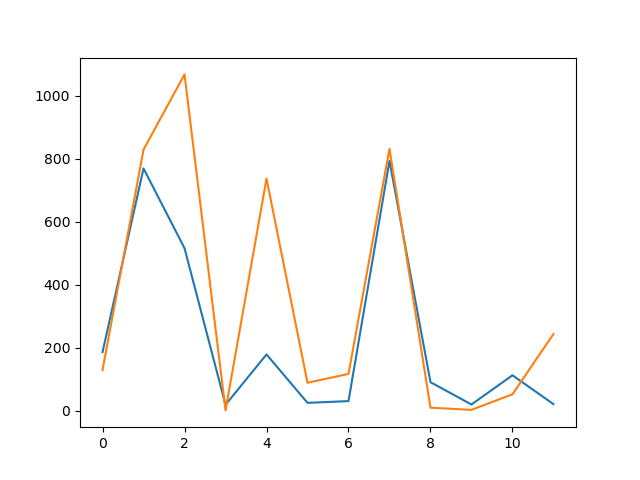

In [56]:
plt.figure()
plt.plot(contrast)
plt.plot(contrasts_fc)

<IPython.core.display.Javascript object>


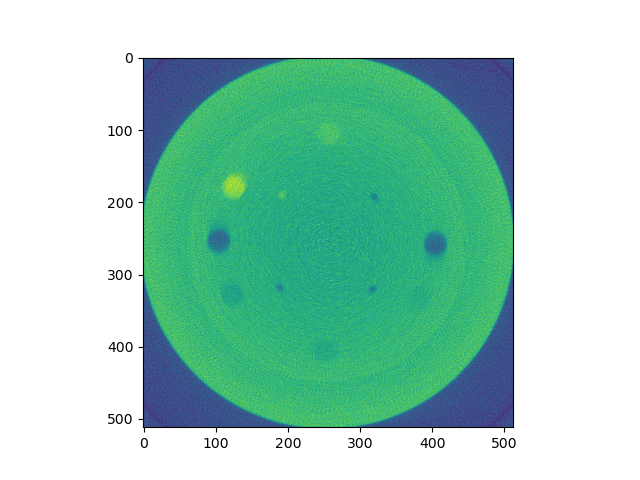

In [30]:
mm = np.nanmean(recon_exp[76,200:300,200:300])
mm_air = np.nanmean(recon_exp[76,450:490,450:490])

im_HU = (recon_exp[76,:,:] - mm)/(mm_air - mm)*-1000

plt.figure()
plt.imshow(im_HU)

<IPython.core.display.Javascript object>


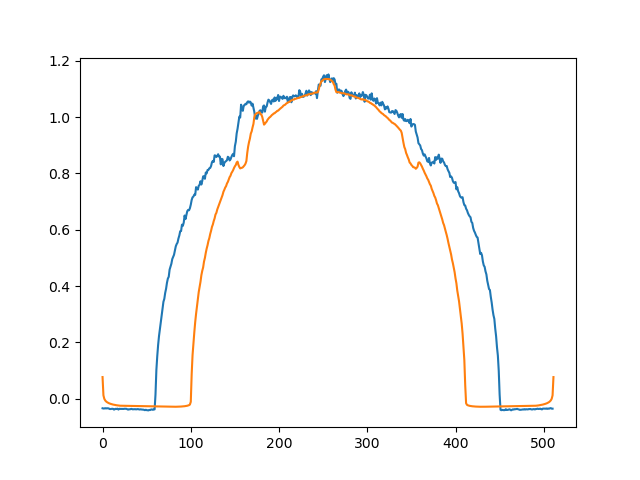

In [44]:
plt.figure()
plt.plot(np.mean(mc_proj[50:100],0))
plt.plot(np.mean(fc_proj[270,10:-10]/10.8,0))